In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile_data.csv


# TASK 
predict the price using the given features

# importing necessary library

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the automobile  the csv file 

In [188]:
auto_df=pd.read_csv('../input/automobile-dataset/Automobile_data.csv')
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


After the loading process comes data cleaning in this we have to handle missing values,outliers and improper data type

# DATA Cleaning Process🧹

### first we need to get some insite of the data we can use info 

let check how many columns  and are present 

In [189]:
auto_df.shape

(205, 26)

In [190]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- As there are no null values accord to the info but as we observed there were '?' in some column which are missing values 
- data and the data type is not matching for some columns:-

In [191]:
auto_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

now checking in how many columns ? is mentioned:


In [192]:
auto_df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

taking look at statctics and iregulrity in data set

In [193]:
auto_df.describe(include='object')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.4,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [194]:
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [195]:
for col in auto_df.columns:
    if '?' in auto_df[col].values:
         print(col + " = " + str(len(auto_df[auto_df[col]=='?'])))

normalized-losses = 41
num-of-doors = 2
bore = 4
stroke = 4
horsepower = 2
peak-rpm = 2
price = 4


Observations:

- There are 41 '?' in normalized losses column
- Others have 2-4 entries with '?'.

To handle

- We will drop '?' entries of price column & num-of-doors column.
- We will replace '?' with mean value for every other column.

In [196]:
auto_df.shape

(205, 26)

In [197]:
auto_df['price'].describe()

count     205
unique    187
top         ?
freq        4
Name: price, dtype: object

if we replace the price by mean or median it would affect are overall analysiis part so it is better to drop the rows

In [198]:
new_df=auto_df[~(auto_df['price']=='?')]
new_df['price']=new_df['price'].astype('int64')
new_df.shape

(201, 26)

In [199]:
(new_df['num-of-doors']=='?').sum()

2

In [200]:
new_df.loc[new_df['num-of-doors']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [201]:
new_df=new_df.loc[~(new_df['num-of-doors']=='?')]

new_df.shape

(199, 26)

In [202]:
# Converting column type to numeric and replacing '?' with mean value
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm']
for col in num_col:
    new_df[col] = new_df[col].replace('?', np.nan)
    new_df[col] = pd.to_numeric(new_df[col])
    new_df[col].fillna(new_df[col].mean(), inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    float64
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

In [203]:
new_df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,199,199,199,199,199,199,199,199,199,199
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,180,164,113,92,116,196,143,155,91


# 4. Exploratory Data Analysis 


In [204]:
num_list=new_df.select_dtypes(include=np.number).columns.tolist()
obj_list=new_df.select_dtypes(include=['object']).columns.tolist()
print('num_list:-->',num_list)
print('obj_list:-->',obj_list)

num_list:--> ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
obj_list:--> ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


## Correlation Between Numerical Features

creating pivot table

In [217]:
cor_table=pd.pivot_table(data=new_df,index=obj_list,values=num_list,aggfunc=['mean'])
cor_table

mean  \
                                                                                                                                     bore   
make        fuel-type aspiration num-of-doors body-style  drive-wheels engine-location engine-type num-of-cylinders fuel-system             
alfa-romero gas       std        two          convertible rwd          front           dohc        four             mpfi         3.470000   
                                              hatchback   rwd          front           ohcv        six              mpfi         2.680000   
audi        gas       std        four         sedan       4wd          front           ohc         five             mpfi         3.190000   
                                                          fwd          front           ohc         five             mpfi         3.190000   
                                                                                                   four             mpfi         3.190000   
...                                                                                                                                   ...   
volvo       gas       std        four         sedan       rwd          front           ohc         four             mpfi         3.780000   
                                                                                       ohcv        six              mpfi         3.580000   
                                              wagon       rwd          front           ohc         four             mpfi         3.780000   
                      turbo      four         sedan       rwd          front           ohc         four             mpfi         3.726667   
                                              wagon       rwd          front           ohc         four             mpfi         3.620000   

                                                                                                                                            \
                                                                                                                                  city-mpg   
make        fuel-type aspiration num-of-doors body-style  drive-wheels engine-location engine-type num-of-cylinders fuel-system              
alfa-romero gas       std        two          convertible rwd          front           dohc        four             mpfi         21.000000   
                                              hatchback   rwd          front           ohcv        six              mpfi         19.000000   
audi        gas       std        four         sedan       4wd          front           ohc         five             mpfi         18.000000   
                                                          fwd          front           ohc         five             mpfi         19.000000   
                                                                                                   four             mpfi         24.000000   
...                                                                                                                                    ...   
volvo       gas       std        four         sedan       rwd          front           ohc         four             mpfi         23.333333   
                                                                                       ohcv        six              mpfi         18.000000   
                                              wagon       rwd          front           ohc         four             mpfi         23.500000   
                      turbo      four         sedan       rwd          front           ohc         four             mpfi         18.333333   
                                              wagon       rwd          front           ohc         four             mpfi         17.000000   

                                                                                                                                                   \
                    

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

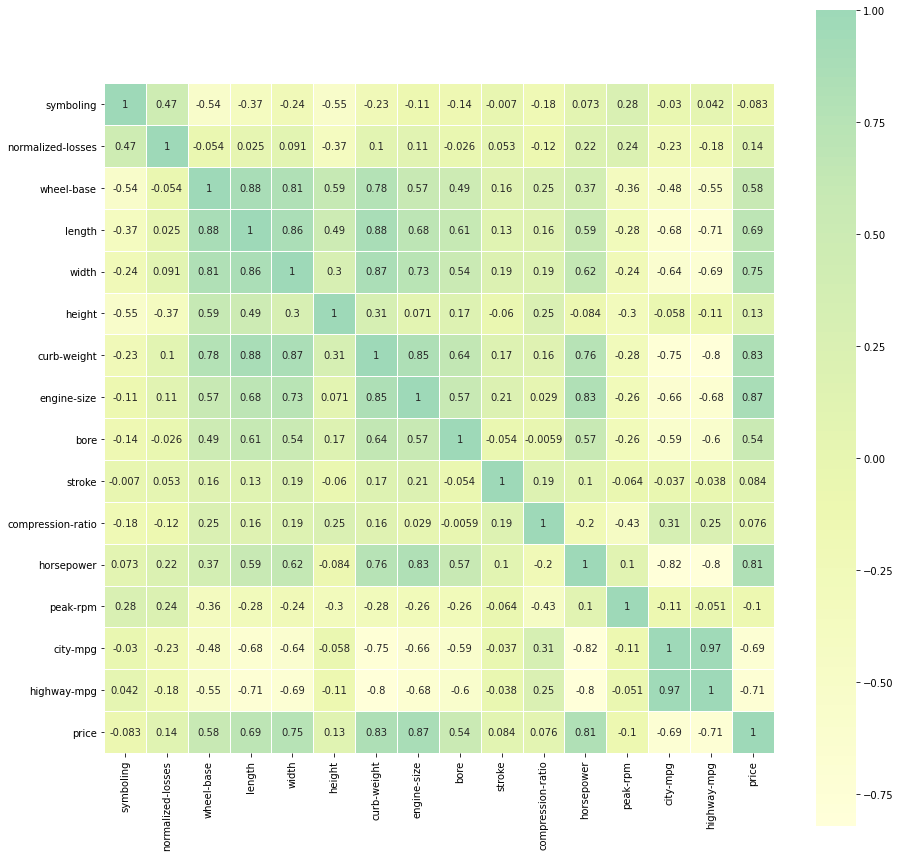

In [207]:
corr = new_df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
           'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']].corr()
f,axes = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(corr.T,cmap='YlGnBu',square=True,annot = True,linewidth = .5,center = 2,ax = axes)

pricising of the car is mainly dependent on the engine size

In [208]:
num = new_df.select_dtypes(include=np.number)
numcorr = num.corr()
Num = numcorr['price'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,price
price,1.000000
engine-size,0.872152
curb-weight,0.834059
horsepower,0.811081
width,0.751628
length,0.691207
wheel-base,0.583842
bore,0.542560
normalized-losses,0.135869
height,0.133639


The engine-size,curb-weight, horsepower have the highest correlation values with the price

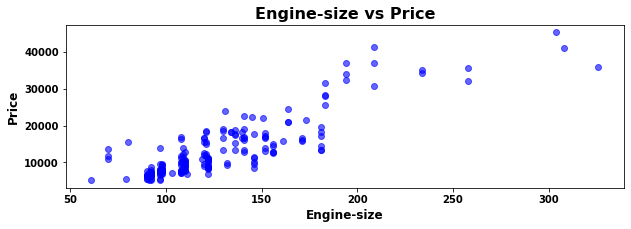

In [209]:
plt.figure(figsize=(10,3))
plt.scatter(x=new_df['engine-size'], y=new_df['price'], color='blue', alpha=0.6)
plt.title('Engine-size vs Price', weight='bold', fontsize=16)
plt.xlabel('Engine-size', weight='bold', fontsize=12)
plt.ylabel('Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

there is linear growth as the engine size increase the price increase

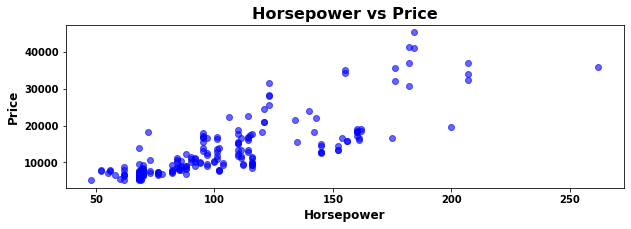

In [210]:
plt.figure(figsize=(10,3))
plt.scatter(x=new_df['horsepower'], y=new_df['price'], color='blue', alpha=0.6)
plt.title('Horsepower vs Price', weight='bold', fontsize=16)
plt.xlabel('Horsepower', weight='bold', fontsize=12)
plt.ylabel('Price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

both horsepower and engine size have high correaltion with price.as you choose higher engine cpacity you have to pay more.

# (c) Univariate Distribution
Picking one continuous variable and checking its distribution.

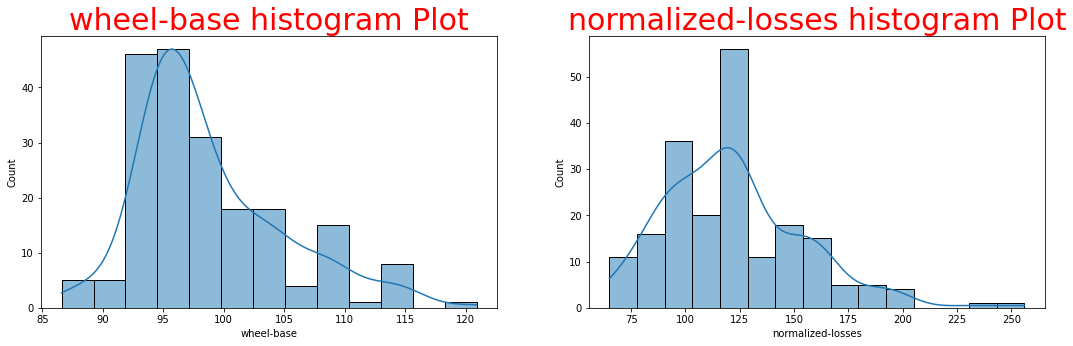

In [215]:
plt.figure(figsize=[18,5])
plt.subplot()
plt.subplot(1,2,1)
sns.histplot(new_df['wheel-base'],kde=True)
plt.title('wheel-base histogram Plot', fontdict={'fontsize':30,'color':'Red'})
plt.subplot(1,2,2)
sns.histplot(new_df['normalized-losses'],kde=True)
plt.title('normalized-losses histogram Plot', fontdict={'fontsize':30,'color':'Red'})
plt.show()

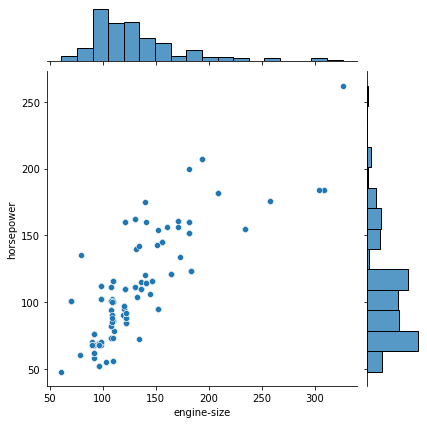

In [219]:
sns.jointplot(data = new_df, x=new_df['engine-size'], y=new_df['horsepower'])
plt.show()

majority of engine size  and horsepower lies between 200 to 150

In [265]:
body_stylecount=new_df['bodystyle'].value_counts().reset_index()
body_style

sedan          92
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [270]:
bodyvsp=new_df[['bodystyle','price']].groupby(by='bodystyle').mean()
bodyvsp

,price
bodystyle,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14563.739130
wagon,12371.960000


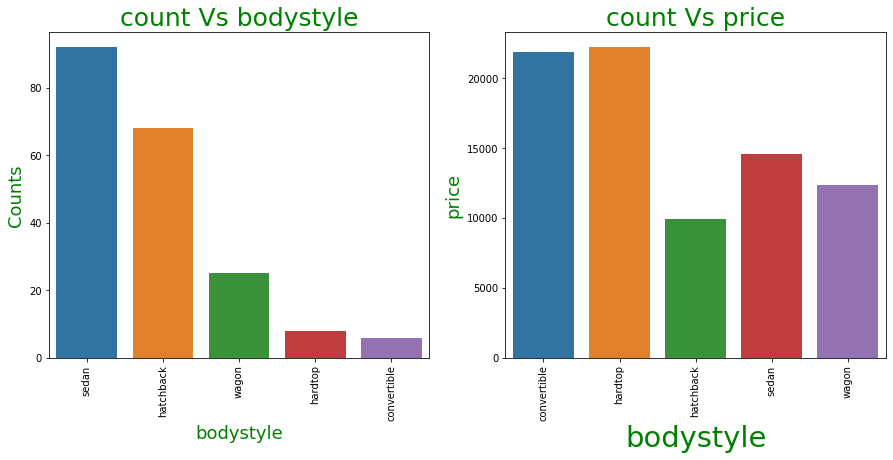

In [269]:
plt.figure(figsize=[15,6])
plt.subplot()
plt.subplot()
plt.subplot(1,2,1)
sns.barplot(data=body_stylecount,x=body_stylecount.iloc[:,0],y=body_stylecount.iloc[:,1])
plt.title('count Vs bodystyle',fontdict={'fontsize':25,'color':'green'})
plt.xlabel('bodystyle',fontdict={'fontsize':18,'color':'Green'})
plt.ylabel('Counts',fontdict={'fontsize':18,'color':'Green'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)

sns.barplot(data=bodyvsp,x=bodyvsp.index,y='price')
plt.title('count Vs price',fontdict={'fontsize':25,'color':'green'})
plt.xlabel('bodystyle',fontdict={'fontsize':29,'color':'Green'})
plt.ylabel('price',fontdict={'fontsize':18,'color':'Green'})
plt.xticks(rotation=90)

plt.show()


from this most frequent car is sedan then hactback.
most expense car is convertable among the given car but the lest frequent car.these means only certain people can offered to by this car.


In [272]:
make=new_df['make'].value_counts().reset_index()
make

,index,make
0,toyota,32
1,nissan,18
2,mazda,16
3,honda,13
4,mitsubishi,13
5,subaru,12
6,volkswagen,12
7,volvo,11
8,peugot,11
9,bmw,8


In [278]:
makevsp=(new_df[['make','price']].groupby(by='make').mean()).sort_values(by='price')
makevsp

,price
make,
chevrolet,6007.000000
dodge,7790.125000
plymouth,7963.428571
honda,8184.692308
subaru,8541.250000
isuzu,8916.500000
mitsubishi,9239.769231
renault,9595.000000
toyota,9885.812500


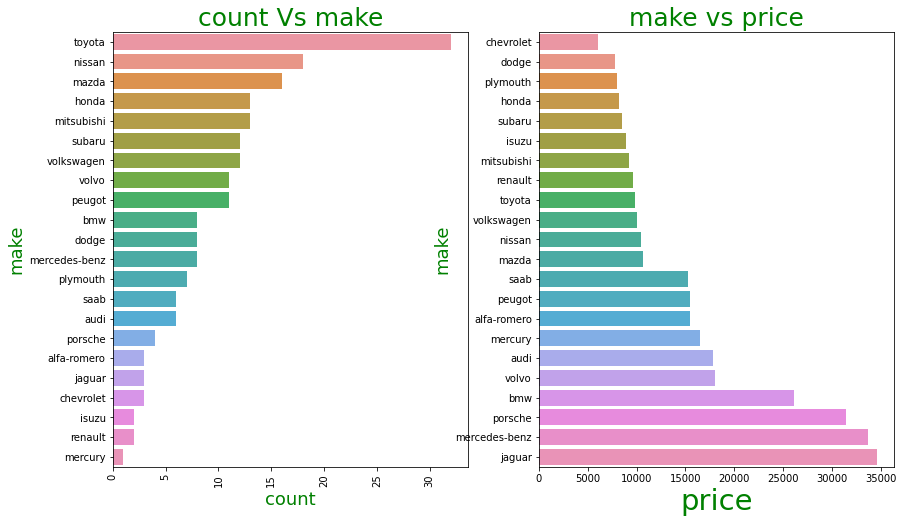

In [290]:
plt.figure(figsize=[14,8])
plt.subplot()
plt.subplot()
plt.subplot(1,2,1)
sns.barplot(data=make,x=make.iloc[:,1],y=make.iloc[:,0])
plt.title('count Vs make',fontdict={'fontsize':25,'color':'green'})
plt.xlabel('count',fontdict={'fontsize':18,'color':'Green'})
plt.ylabel('make',fontdict={'fontsize':18,'color':'Green'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)

sns.barplot(data=makevsp,x='price',y=makevsp.index)
plt.title('make vs price',fontdict={'fontsize':25,'color':'green'})
plt.xlabel('price',fontdict={'fontsize':29,'color':'Green'})
plt.ylabel('make',fontdict={'fontsize':18,'color':'Green'})
plt.xticks()

plt.show()

In [294]:
drivewheels=new_df['drivewheels'].value_counts().reset_index()
drivewheels

,index,drivewheels
0,fwd,116
1,rwd,75
2,4wd,8


In [302]:
drivevsp=(new_df[['drivewheels','price']].groupby(by='drivewheels').mean()).sort_values(by='price',ascending=False)
drivevsp

,price
drivewheels,
rwd,19757.613333
4wd,10241.000000
fwd,9237.336207


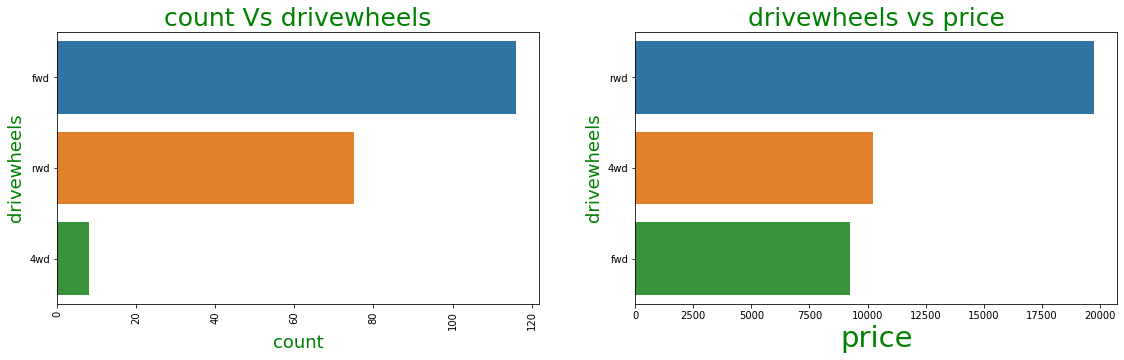

In [303]:
plt.figure(figsize=[19,5])
plt.subplot()
plt.subplot()
plt.subplot(1,2,1)
sns.barplot(data=drivewheels,x=drivewheels.iloc[:,1],y=drivewheels.iloc[:,0])
plt.title('count Vs drivewheels',fontdict={'fontsize':25,'color':'green'})
plt.xlabel('count',fontdict={'fontsize':18,'color':'Green'})
plt.ylabel('drivewheels',fontdict={'fontsize':18,'color':'Green'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)

sns.barplot(data=drivevsp,x='price',y=drivevsp.index)
plt.title('drivewheels vs price',fontdict={'fontsize':25,'color':'green'})
plt.xlabel('price',fontdict={'fontsize':29,'color':'Green'})
plt.ylabel('drivewheels',fontdict={'fontsize':18,'color':'Green'})
plt.xticks()

plt.show()

# (a) Checking Outliers

In [305]:
new_df.describe() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.844221,121.840491,98.822613,174.267839,65.896482,53.773869,2558.065327,127.045226,3.331949,3.255538,10.114171,103.604061,5118.020305,25.130653,30.633166,13242.613065
std,1.259651,32.103986,6.086103,12.323033,2.106373,2.446730,519.189151,41.703898,0.268538,0.317355,3.920762,37.448626,478.600274,6.408881,6.801746,7978.344857
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,99.500000,94.500000,166.800000,64.150000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,121.840491,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5118.020305,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In normalized-losses column most of the values are below 200 but maximum value is 256 that's weird! Let's visualize the numerical quantities in our dataset as boxplots, to have a better sense of the outliers.



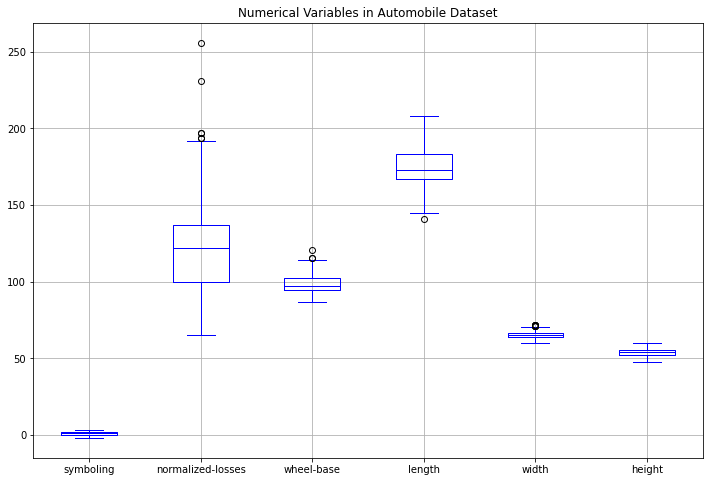

In [310]:
numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height'] 
plt.figure(figsize=(12,8))
plt.title("Numerical Variables in Automobile Dataset")
new_df[numeric_cols].boxplot(color='blue')
plt.show()

2 outliers in normalized-losses column.

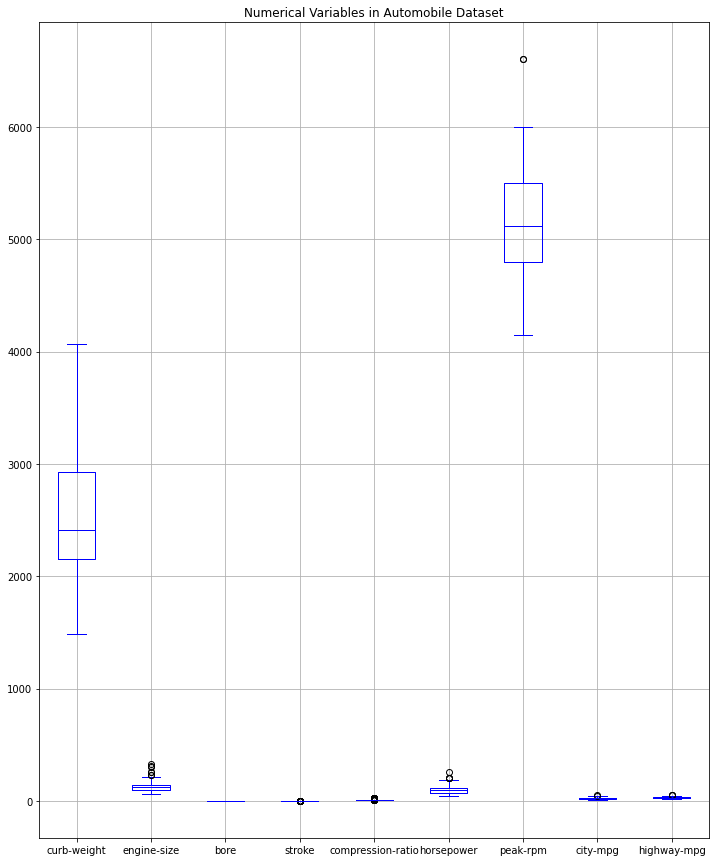

In [313]:

# Taking rest of the numeric columns
numeric_cols = ['curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
plt.figure(figsize=(12,15))
plt.title("Numerical Variables in Automobile Dataset")
new_df[numeric_cols].boxplot(color='blue')
plt.show()

# (b) Handling Outliers
For normalized-losses outliers: Replace with mean value.
For peak-rpm: Remove outlier entry.

In [317]:
new_df.rename(columns={'normalized-losses': 'normalizedlosses', 'peak-rpm': 'peakrpm'}, inplace=True)
new_df.columns

Index(['symboling', 'normalizedlosses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'bodystyle', 'drivewheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [318]:
new_df['normalizedlosses'].unique()

array([121.8404908, 164.       , 158.       , 192.       , 188.       ,
       121.       ,  98.       ,  81.       , 118.       , 148.       ,
       110.       , 145.       , 137.       , 101.       ,  78.       ,
       106.       ,  85.       , 107.       , 104.       , 113.       ,
       150.       , 129.       , 115.       ,  93.       , 142.       ,
       161.       , 153.       , 125.       , 128.       , 122.       ,
       103.       , 168.       , 108.       , 194.       , 231.       ,
       119.       , 154.       ,  74.       , 186.       ,  83.       ,
       102.       ,  89.       ,  87.       ,  77.       ,  91.       ,
       134.       ,  65.       , 197.       ,  90.       ,  94.       ,
       256.       ,  95.       ])

In [322]:
new_df['normalizedlosses'] = new_df['normalizedlosses'].replace(256.0, np.nan)
new_df['normalizedlosses'].fillna(new_df['normalizedlosses'].mean(), inplace=True)


In [321]:
new_df['normalizedlosses'] = new_df['normalizedlosses'].replace(231.0, np.nan)
new_df['normalizedlosses'].fillna(new_df['normalizedlosses'].mean(), inplace=True)
new_df['normalizedlosses'].unique()

array([121.8404908 , 164.        , 158.        , 192.        ,
       188.        , 121.        ,  98.        ,  81.        ,
       118.        , 148.        , 110.        , 145.        ,
       137.        , 101.        ,  78.        , 106.        ,
        85.        , 107.        , 104.        , 113.        ,
       150.        , 129.        , 115.        ,  93.        ,
       142.        , 161.        , 153.        , 125.        ,
       128.        , 122.        , 103.        , 168.        ,
       108.        , 194.        , 120.60818478, 119.        ,
       154.        ,  74.        , 186.        ,  83.        ,
       102.        ,  89.        ,  87.        ,  77.        ,
        91.        , 134.        ,  65.        , 197.        ,
        90.        ,  94.        , 121.16291752,  95.        ])

In [325]:
# Dropping both entries
i = new_df[((new_df.peakrpm == 6600.0))].index
new_df = new_df.drop(i)

Computation for Categorical Variables


Printing all categorical variable columns

In [326]:
new_df.select_dtypes(include=['object']).copy().head()

,make,fuel-type,aspiration,num-of-doors,bodystyle,drivewheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


(a) Find and Replace: num-of-doors & num-of-cylinders
    
There are two columns of data where the values are words used to represent numbers: the number of cylinders and number of doors on the car.

In [328]:
print(new_df["num-of-doors"].value_counts())
print(new_df["num-of-cylinders"].value_counts())

four    113
two      84
Name: num-of-doors, dtype: int64
four      153
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64


In [330]:
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
new_df = new_df.replace(cleanup_nums)
new_df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,bodystyle,drivewheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peakrpm,city-mpg,highway-mpg,price
0,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,121.840491,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,121.840491,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.000000,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.000000,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


(b) Dummy Variable Encoding for body-style column and drive-wheels


Label encoding is simply converting each value in a column to a number.

In [331]:
print(new_df['bodystyle'].unique())
print(new_df['drivewheels'].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


In [332]:
new_df = pd.get_dummies(new_df, columns=["bodystyle", "drivewheels"], prefix=["body", "drive"])
new_df.head()

,symboling,normalizedlosses,make,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,...,highway-mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,13495,1,0,0,0,0,0,0,1
1,3,121.840491,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,16500,1,0,0,0,0,0,0,1
2,1,121.840491,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,26,16500,0,0,1,0,0,0,0,1
3,2,164.000000,audi,gas,std,4,front,99.8,176.6,66.2,...,30,13950,0,0,0,1,0,0,1,0
4,2,164.000000,audi,gas,std,4,front,99.4,176.6,66.4,...,22,17450,0,0,0,1,0,1,0,0


(c) Custom Binary Encoding for engine-type

In [333]:
new_df["engine-type"].value_counts()

ohc      143
ohcf      15
ohcv      13
l         12
dohc      10
rotor      4
Name: engine-type, dtype: int64

For the sake of discussion, maybe all we care about is whether or not the engine is an Overhead Cam (OHC) or not. In other words, the various versions of OHC are all the same for this analysis.

In [335]:
new_df["OHC_Code"] = np.where(new_df["engine-type"].str.contains("ohc"), 1, 0)
new_df[["make", "engine-type", "OHC_Code"]].head(20)

,make,engine-type,OHC_Code
0,alfa-romero,dohc,1
1,alfa-romero,dohc,1
2,alfa-romero,ohcv,1
3,audi,ohc,1
4,audi,ohc,1
5,audi,ohc,1
6,audi,ohc,1
7,audi,ohc,1
8,audi,ohc,1
10,bmw,ohc,1


# (d) Ordinal Encoding for make column


In [339]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
new_df["make_code"] = ord_enc.fit_transform(new_df[["make"]])
new_df[["make", "make_code"]].head(20)

,make,make_code
0,alfa-romero,0.0
1,alfa-romero,0.0
2,alfa-romero,0.0
3,audi,1.0
4,audi,1.0
5,audi,1.0
6,audi,1.0
7,audi,1.0
8,audi,1.0
10,bmw,2.0


# Selecting Necessary Columns for ML Model


In [340]:
new_df.select_dtypes(include=np.number).columns.tolist()

['symboling',
 'normalizedlosses',
 'num-of-doors',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peakrpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'body_convertible',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'drive_4wd',
 'drive_fwd',
 'drive_rwd',
 'OHC_Code',
 'make_code']

In [341]:
feed = new_df[['symboling', 'normalizedlosses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
           'compression-ratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg', 'price', 'num-of-doors', 'num-of-cylinders', 'body_convertible', 
           'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon', 'drive_4wd', 'drive_fwd', 'drive_rwd', 'OHC_Code', 'make_code']]
feed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   normalizedlosses   197 non-null    float64
 2   wheel-base         197 non-null    float64
 3   length             197 non-null    float64
 4   width              197 non-null    float64
 5   height             197 non-null    float64
 6   curb-weight        197 non-null    int64  
 7   engine-size        197 non-null    int64  
 8   bore               197 non-null    float64
 9   stroke             197 non-null    float64
 10  compression-ratio  197 non-null    float64
 11  horsepower         197 non-null    float64
 12  peakrpm            197 non-null    float64
 13  city-mpg           197 non-null    int64  
 14  highway-mpg        197 non-null    int64  
 15  price              197 non-null    int64  
 16  num-of-doors       197 non

Now we'll fit our linear regression & Gradient Boosting Regressor models on these numerical variables

# 6. Building Machine Learning Model 🤖
(a) Preparing Training and Testing datasets

In [342]:
# Taking all independent variable columns
df_train_x = feed.drop('price',axis = 1)
df_train_x.describe()

,symboling,normalizedlosses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd,OHC_Code,make_code
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.842640,120.127050,98.866497,174.324365,65.915736,53.785787,2560.862944,127.340102,3.332882,3.257321,...,0.030457,0.040609,0.340102,0.461929,0.126904,0.040609,0.588832,0.370558,0.918782,12.294416
std,1.265963,29.391750,6.101313,12.372840,2.108318,2.456292,521.077834,41.812276,0.269743,0.318472,...,0.172279,0.197886,0.474950,0.499819,0.333713,0.197886,0.493299,0.484185,0.273866,6.244558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,98.000000,94.500000,166.800000,64.200000,52.000000,2145.000000,97.000000,3.150000,3.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
50%,1.000000,121.840491,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.330000,3.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,12.000000
75%,2.000000,134.000000,102.400000,183.500000,66.900000,55.600000,2935.000000,145.000000,3.590000,3.410000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,19.000000
max,3.000000,197.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [343]:
# Target variable column
df_train_y = feed['price']
df_train_y.describe

<bound method NDFrame.describe of 0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 197, dtype: int64>

# (b) Splitting of Training & Testing sets

In [349]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [350]:
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.15, random_state=42)

# (A) Linear Regression Model

In [351]:
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)

### r2_score of Linear Regression

In [352]:
print("r2_score is : " , r2_score(y_test, predictions))

r2_score is :  0.9052281109949657


<AxesSubplot:xlabel='price'>

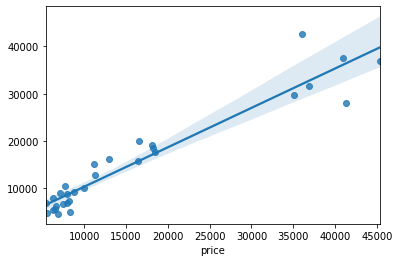

In [353]:
sns.regplot(x = y_test, y = predictions)

# (B) Gradient Boosting Regressor Model

In [354]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor().fit(x_train, y_train)
predictions = reg.predict(x_test)

r2_score of Gradient Boosting Regressor

In [355]:
print("r2_score is : " , r2_score(y_test, predictions))

r2_score is :  0.929929673249248


# Visualization

<AxesSubplot:xlabel='price'>

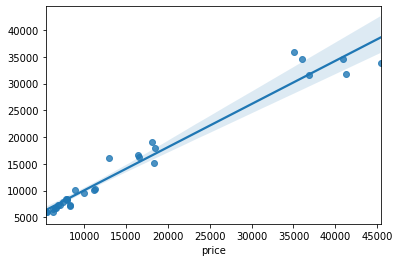

In [356]:
sns.regplot(x = y_test, y = predictions)

## Gradient Boosting Regressor with r2 score of 0.93 performed better than Linear Regression with r2 score of 0.90